<a href="https://colab.research.google.com/github/zoyaahmad18/Car-Price-Predictor/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing libraries and dependencies**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### **Importing Dataset**

In [4]:
dataset = pd.read_csv("car data.csv");
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

In [5]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
dataset.shape

(301, 9)

In [ ]:
#  print(dataset.Seller_Type)
# dataset.columns.get_loc(Seller_Type)

In [7]:
# Checking if missing values present or not. If present, SimpleImputer module is to be applied.
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Checking distribution of categorical data
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
# Encoding categorical data
dataset.replace({'Fuel_Type':{'Petrol':1,'Diesel':2,'CNG':3}},inplace=True)

dataset.replace({'Seller_Type':{'Dealer':1,'Individual':2}},inplace=True)

dataset.replace({'Transmission':{'Manual':1,'Automatic':2}},inplace=True)

In [13]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0


Splitting the data and target

In [19]:
X=dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=dataset['Selling_Price']

In [ ]:
print(X)

In [33]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [23]:
#Splitting data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

Model Training

Linear Regression

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

Model Evaluation

In [40]:
#Prediction on training data
y_train_pred = regressor.predict(X_train)

In [41]:
# R squared training data
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)
# print("R squared value is: ",r2_score)

0.8800594535535695

Visualizes actual and predicted prices

In [ ]:
plt.scatter(y_train,y_train_pred)
# plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Car Price Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.show()

In [46]:
#Prediction on test data
y_test_pred = regressor.predict(X_test)

In [47]:
# R squared test data
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)
# print("R squared value is: ",r2_score)

0.8484549412088814

In [ ]:
plt.scatter(y_test,y_test_pred)
# plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Car Price Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.show()

In [ ]:
Lasso Regression

In [59]:
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

Model Evaluation

In [60]:
#Prediction on training data
y_train_pred = lasso_reg.predict(X_train)

In [61]:
# R squared training data
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)
# print("R squared value is: ",r2_score)

0.8416309679582044

Visualizes actual and predicted prices

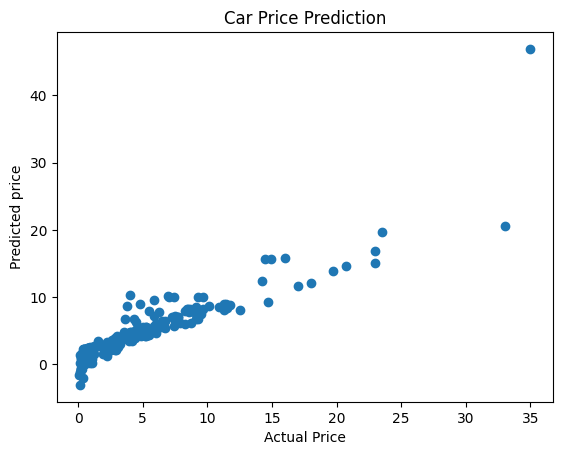

In [62]:
plt.scatter(y_train,y_train_pred)
# plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Car Price Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.show()

In [63]:
#Prediction on test data
y_test_pred = lasso_reg.predict(X_test)

In [64]:
# R squared test data
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)
# print("R squared value is: ",r2_score)

0.8544755211923214

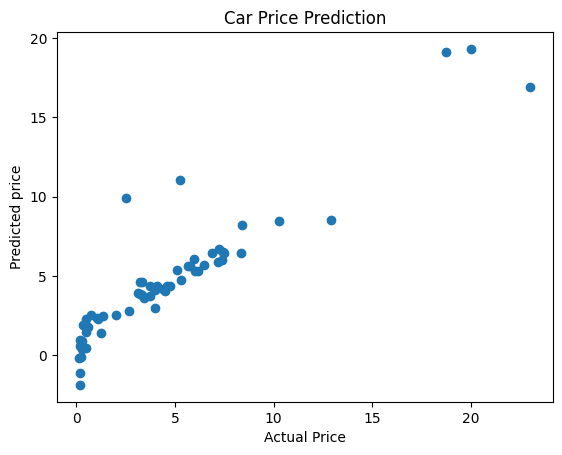

In [65]:
plt.scatter(y_test,y_test_pred)
# plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Car Price Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.show()